# **Análisis exploratorio de datos de Google Maps y Yelp**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Se realiza un análisis exploratorio de los datos, con la finalidad de encontrar patrones que permitan generar información para la toma de decisiones en relación a los restaurantes existentes en los estados de **California**, **Texas**, **Florida**, **New York** & **Pennsylvania**.<br>Esto con el objetivo de identificar las oportunidades de inversión en el sector gastronómico, ya que hemos observado una fuerte tendencia del público hacia ése sector.







Para una lectura mas ordenada, los códigos de gráficos y otros datos se colocaron en funciones dentro de la librería `functions` que se adjunta en este repositorio.

###Importamos las librerías necesarias para el análisis

In [1]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import functions
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


## Abrimos el archivo que contiene los datos de Google Maps y Yelp.

In [ ]:
df_final = pd.read_parquet('/content/drive/MyDrive/PF-Henry/Henry - Proyecto Final/Datos PF Henry/Unified/Final/df_unified.parquet')


## Verificamos que no se registren valores nulos en los datos

Siempre es importante recordar verificar esta información, para poder saber si la calidad de datos es buena o si presenta algún tipo de error. En este caso podemos observar que los datos están completamente limpios y sin datos faltantes.

In [ ]:
functions.contar_nulos(df_final)

,cantidad_nulos
user_id,0
business_id,0
rating,0
year,0
month,0
sentiment_analysis,0
business_name,0
category,0
avg_rating,0
review_count,0


In [ ]:
# Eliminamos la columna review_id, ya que no es necesaria para el análisis

df_final.drop(columns='review_id', inplace=True)

df_final.head(3)

,user_id,business_id,rating,year,month,sentiment_analysis,business_name,category,avg_rating,review_count,address,state,city,postal_code,latitude,longitude,cluster,county,%_competition
0,3-1va0IQfK-9tUMzfHWfTA,MTSW4McQd7CbVtyjqoe9mw,5.0,2018.0,5.0,5.0,St Honore Pastries,Cafe,4.0,80.0,935 Race St,California,Philadelphia,19107,39.955505,-75.155564,33.0,Philadelphia County,3.96668
1,KQSRUu4Aapl0hG6eu2v8iw,MTSW4McQd7CbVtyjqoe9mw,4.0,2018.0,3.0,5.0,St Honore Pastries,Cafe,4.0,80.0,935 Race St,California,Philadelphia,19107,39.955505,-75.155564,33.0,Philadelphia County,3.96668
2,qUfRCH5NUyRDsJfM6jA5PQ,MTSW4McQd7CbVtyjqoe9mw,4.0,2017.0,4.0,5.0,St Honore Pastries,Cafe,4.0,80.0,935 Race St,California,Philadelphia,19107,39.955505,-75.155564,33.0,Philadelphia County,3.96668


### Verificamos el tipo de dato de cada columna

In [ ]:
functions.verificar_tipo_variable(df_final)

,nombre_campo,tipo_datos
0,user_id,[<class 'str'>]
1,business_id,[<class 'str'>]
2,rating,[<class 'float'>]
3,year,[<class 'float'>]
4,month,[<class 'float'>]
5,sentiment_analysis,[<class 'float'>]
6,business_name,[<class 'str'>]
7,category,[<class 'str'>]
8,avg_rating,[<class 'float'>]
9,review_count,[<class 'float'>]


### Debido a que algunas columnas contienen datos en tipo *float*, se van a modificar a tipo *int* ya que es necesario realizar ese cambio.

In [ ]:
df_final['year'] = pd.to_numeric(df_final['year'], downcast='integer')
df_final['month'] = pd.to_numeric(df_final['month'], downcast='integer')
df_final['sentiment_analysis'] = pd.to_numeric(df_final['sentiment_analysis'], downcast='integer')

Chequeamos que se hayan realizado los cambios correctamente

In [ ]:
functions.verificar_tipo_variable(df_final)

,nombre_campo,tipo_datos
0,user_id,[<class 'str'>]
1,business_id,[<class 'str'>]
2,rating,[<class 'float'>]
3,year,[<class 'int'>]
4,month,[<class 'int'>]
5,sentiment_analysis,[<class 'int'>]
6,business_name,[<class 'str'>]
7,category,[<class 'str'>]
8,avg_rating,[<class 'float'>]
9,review_count,[<class 'float'>]


##Filtrando ciudades por latitud y longitud

Encontramos varios errores en valores de latitud y longitud, por lo cual procedemos a corregirlos.

In [ ]:
# Filtrar y corregir datos incorrectos
df_corregido = df_final.copy()  # Crear una copia del DataFrame original para realizar los cambios

# Filtrar filas que no cumplen con las condiciones para cada estado
df_corregido['Florida'] = (
    (df_corregido['latitude'] >= 24.396308) & (df_corregido['latitude'] <= 31.000968) &
    (df_corregido['longitude'] >= -87.634643) & (df_corregido['longitude'] <= -80.031362)
)

df_corregido['California'] = (
    (df_corregido['latitude'] >= 32.534156) & (df_corregido['latitude'] <= 42.009518) &
    (df_corregido['longitude'] >= -124.409591) & (df_corregido['longitude'] <= -114.131211)
)

df_corregido['Pennsylvania'] = (
    (df_corregido['latitude'] >= 39.719800) & (df_corregido['latitude'] <= 42.269179) &
    (df_corregido['longitude'] >= -80.519891) & (df_corregido['longitude'] <= -74.689516)
)

df_corregido['NewYork'] = (
    (df_corregido['latitude'] >= 40.477399) & (df_corregido['latitude'] <= 45.015850) &
    (df_corregido['longitude'] >= -79.762152) & (df_corregido['longitude'] <= -71.856214)
)

df_corregido['Texas'] = (
    (df_corregido['latitude'] >= 25.837377) & (df_corregido['latitude'] <= 36.500704) &
    (df_corregido['longitude'] >= -106.645646) & (df_corregido['longitude'] <= -93.508292)
)

# Marcar filas con datos incorrectos
df_corregido['Datos_correctos'] = (
    df_corregido['Florida'] | df_corregido['California'] | df_corregido['Pennsylvania'] |
    df_corregido['NewYork'] | df_corregido['Texas']
)

# Eliminar filas con datos incorrectos
df_corregido = df_corregido[df_corregido['Datos_correctos']]

# Eliminar columnas temporales
df_corregido.drop(['Florida', 'California', 'Pennsylvania', 'NewYork', 'Texas', 'Datos_correctos'], axis=1, inplace=True)

# Ahora df_corregido contiene solo las filas con datos correctos según las condiciones de latitud y longitud para cada estado


In [ ]:
df_final = df_corregido.copy()

In [ ]:
#Guardamos los datos de registros con las latitudes y longitudes corregidas

df_final.to_parquet('datos_finales_corregidos.parquet')

## ***Análisis temporal de reviews***

Éste análisis nos sirve para empezar a tener conocimiento sobre el comportamiento del mercado con respecto a las reseñas de los usuarios a través de los años.

Reviews por año

Cantidad de reseñas promedio por día: 1186


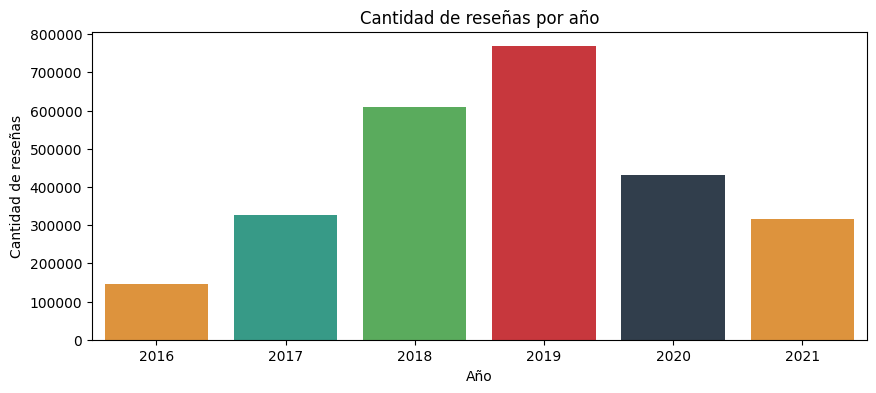

In [21]:
functions.reviews_por_año(df_final)

En el gráfico podemos ver que desde 2016 hasta 2019, hubo un crecimiento exponencial en las visitas de clientes a restaurantes. Luego eso se vió muy afectado por el efecto de la pandemia de COVID-19, lo cual generó una notable disminución de visitas.

Reviews por mes por año

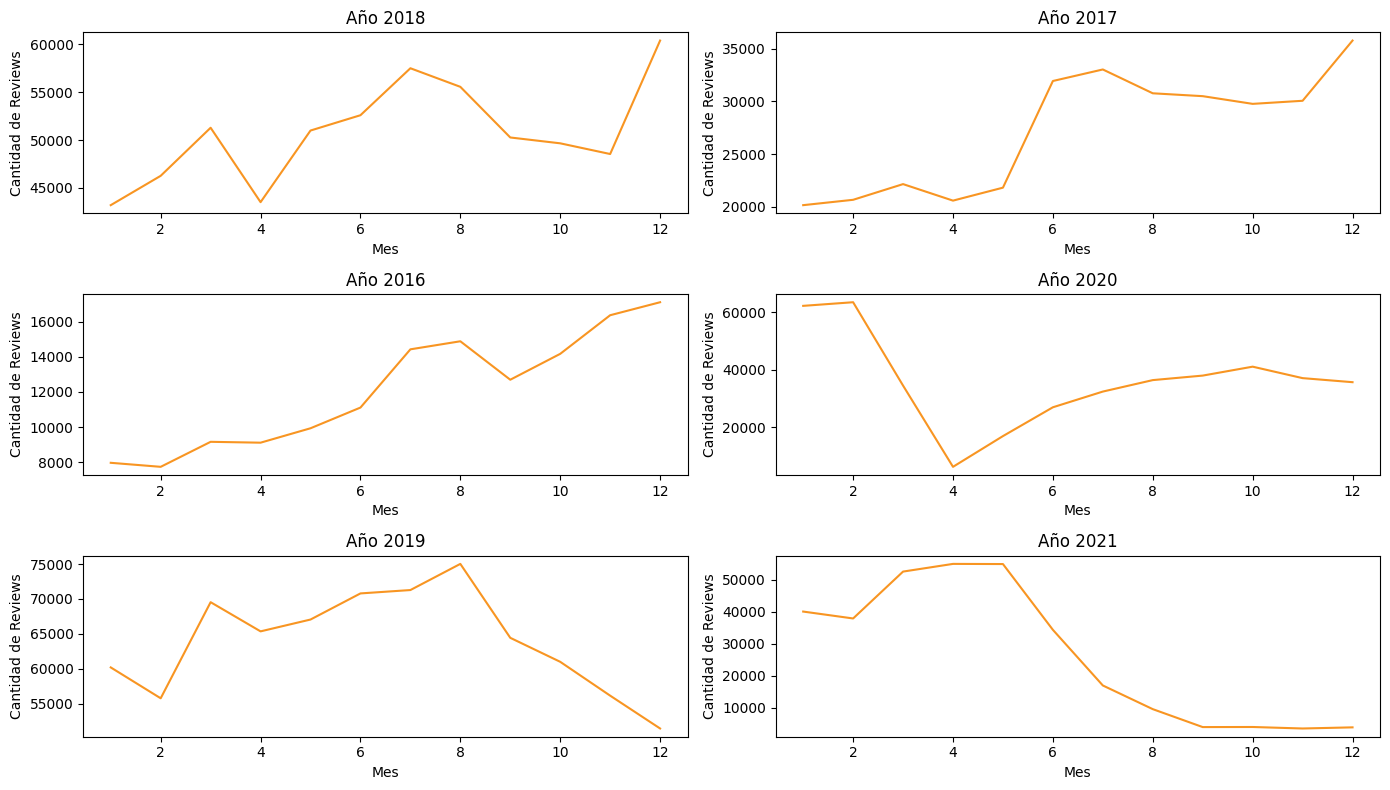

In [8]:
functions.reviews_mensuales(df_final)

En este gráfico no encontramos patrones a nivel general, pero si podemos observar la disminución de reseñas a partir del año 2019 y durante todo el 2020, esto debido a las restricciones de la pandemia de COVID-19.

Reviews por mes

El mes con menor cantidad de reviews tiene 191643 reviews
El mes con mayor cantidad de reviews tiene 239204 reviews


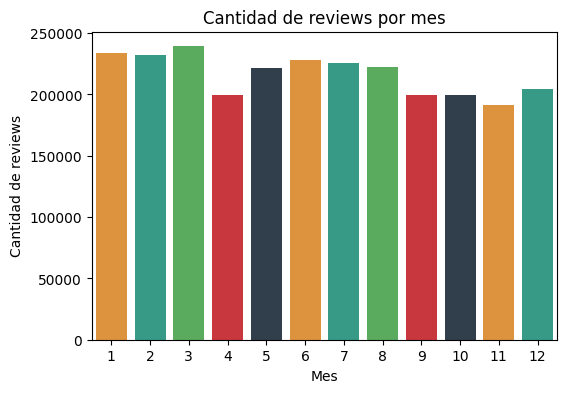

In [9]:
functions.cantidad_de_reviews_por_mes(df_final)

En el gráfico podemos observar que los primeros meses del año (Enero a Marzo), en general, son los meses con mayor cantidad de reseñas registradas. esto se puede relacionar con las fiestas importantes, como por ejemplo el año nuevo en enero o también en el mes de marzo se festeja 'San Patricio', el cual es un evento bastante llamativo y popular.<br>
Luego en Noviembre vemos una gran disminución, esto se relaciona con que los clientes no visitan muchos restaurantes debido a la cercanía de las fiestas de navidad y fin de año.

## ***Análisis de competitividad***

### En este apartado empezamos a hacer enfoque en nuestro objetivo. Por lo cual es importante de antemano conocer el nivel de competencia que hay en cada uno.

Rating promedio de restaurantes por estado

In [19]:
functions.promedio_rating_reviews(df_final)

,state,avg_rating
0,California,4.245631
1,Florida,4.116139
2,New York,4.257464
3,Pennsylvania,4.081765
4,Texas,4.189384


Competitividad por estado

In [20]:
functions.competitividad_por_estado(df_final)

,state,%_competence
0,California,6.866454
1,Florida,6.078944
2,New York,7.268549
3,Pennsylvania,6.206353
4,Texas,8.021482


En este apartado podemos visualizar lo siguiente: <br>
- En nivel de rating es muy parejo en los 5 estados, aunque New York tiene el mayor promedio.
- En cuanto al porcentaje de competencia, podemos ver una diferencia de 2 puntos entre el primer lugar(Texas con 8.02%) y el último (Florida con 6.07%).

## ***Análisis cuantitativo***

### En este apartado, buscamos encontrar en qué estado hay mayor concentración de restaurantes, la distribución dentro de los mismos y si ha habido un crecimiento o decrecimiento en las cantidades a través del tiempo.

Cantidad porcentual de restaurantes por estado en 2021

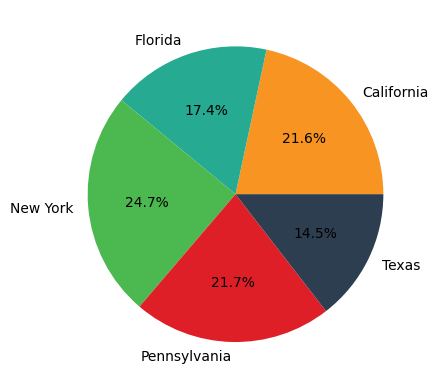

In [16]:
functions.restaurants_por_estado(df_final)

En el gráfico podemos observar que en general hay una distribución pareja de la cantidad de restaurantes entre los 5 estados. Pero New York es el estado que conserva la mayor cantidad de restaurantes con un 24.7% del total y Texas tiene solamente un 14.5%.

Cantidad de restaurantes por año por estado

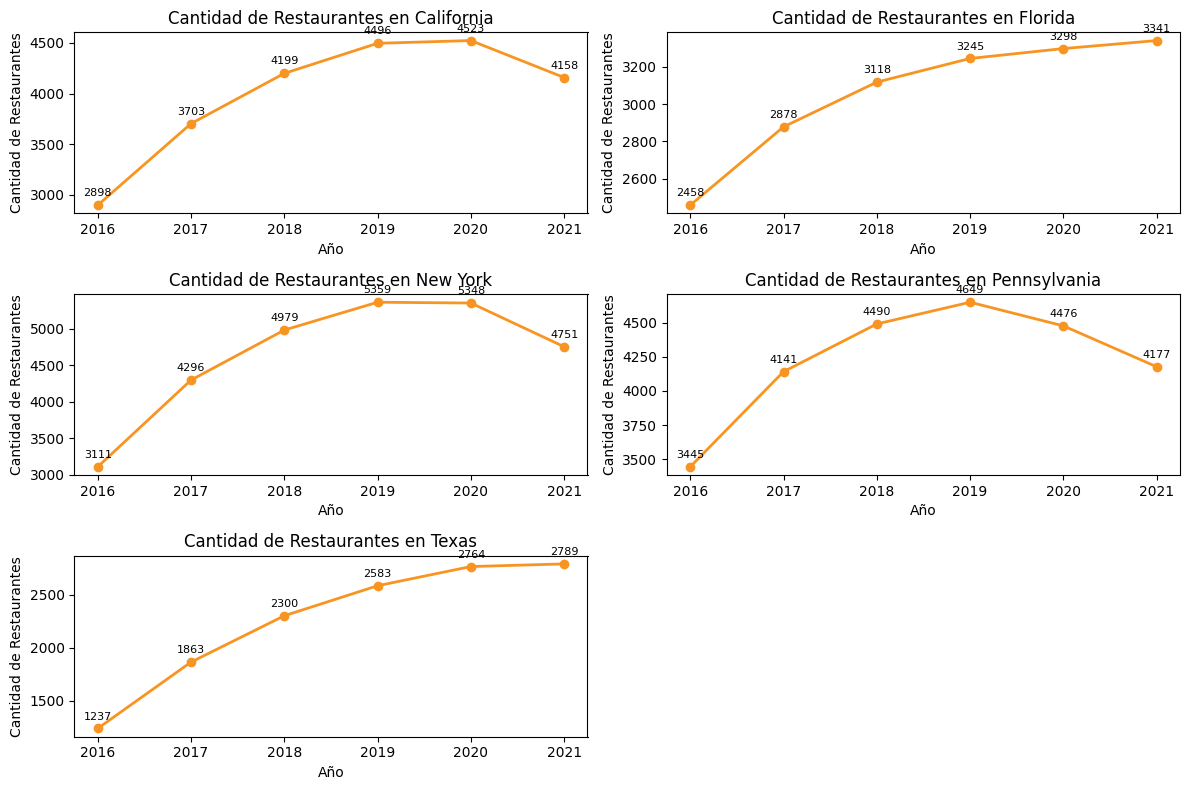

In [17]:
functions.cant_restaurantes(df_final)

En los gráficos podemos ver que, en general, en todos los estados hubo una evolución de la cantidad de restaurantes a través de los años, hasta el año 2020 donde en algunos estados, se registra una baja en las cantidades, esto debido a las restricciones por la pandemia de COVID-19.

Restaurantes por ciudad por estado

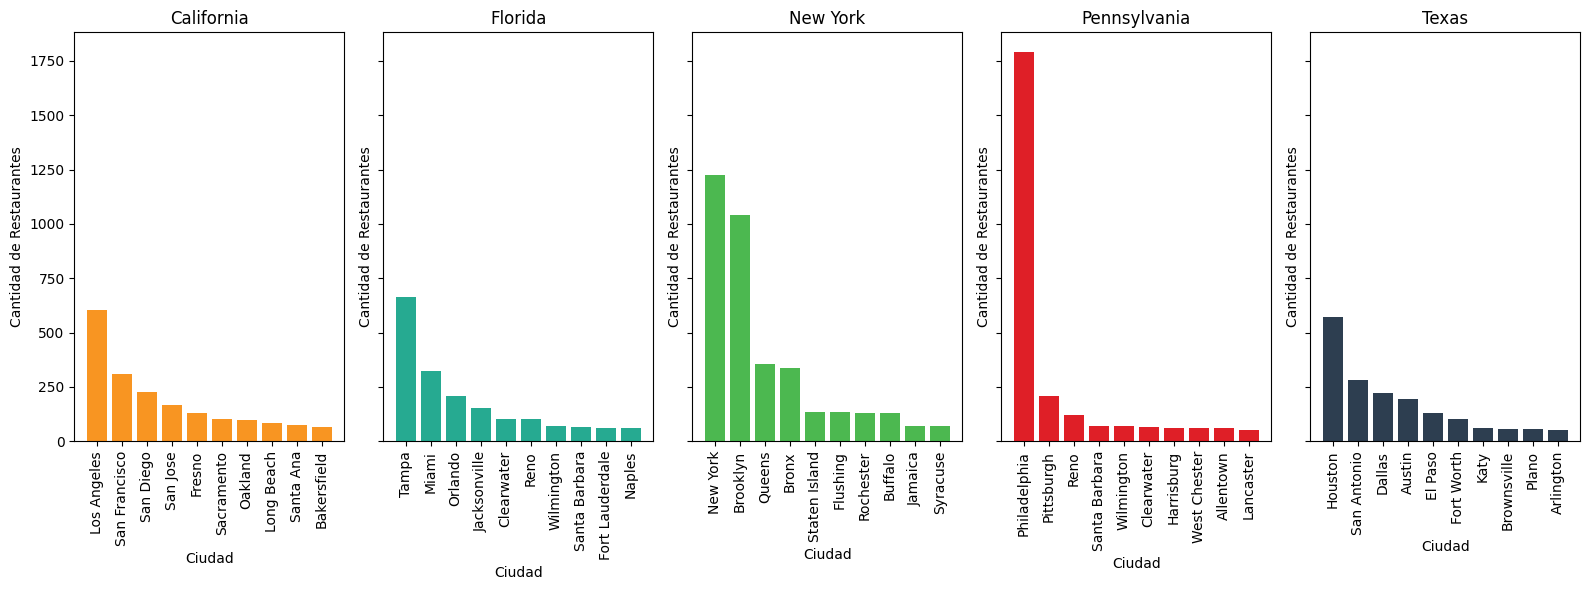

In [14]:
functions.restaurantes_por_ciudad(df_final)

Éste gráfico nos ayuda a identificar mejor la distribución de restaurantes en cada uno de los estados, esto para saber si se concentran solamente en un lugar o es una distribución más equitativa.

Categorías por estado

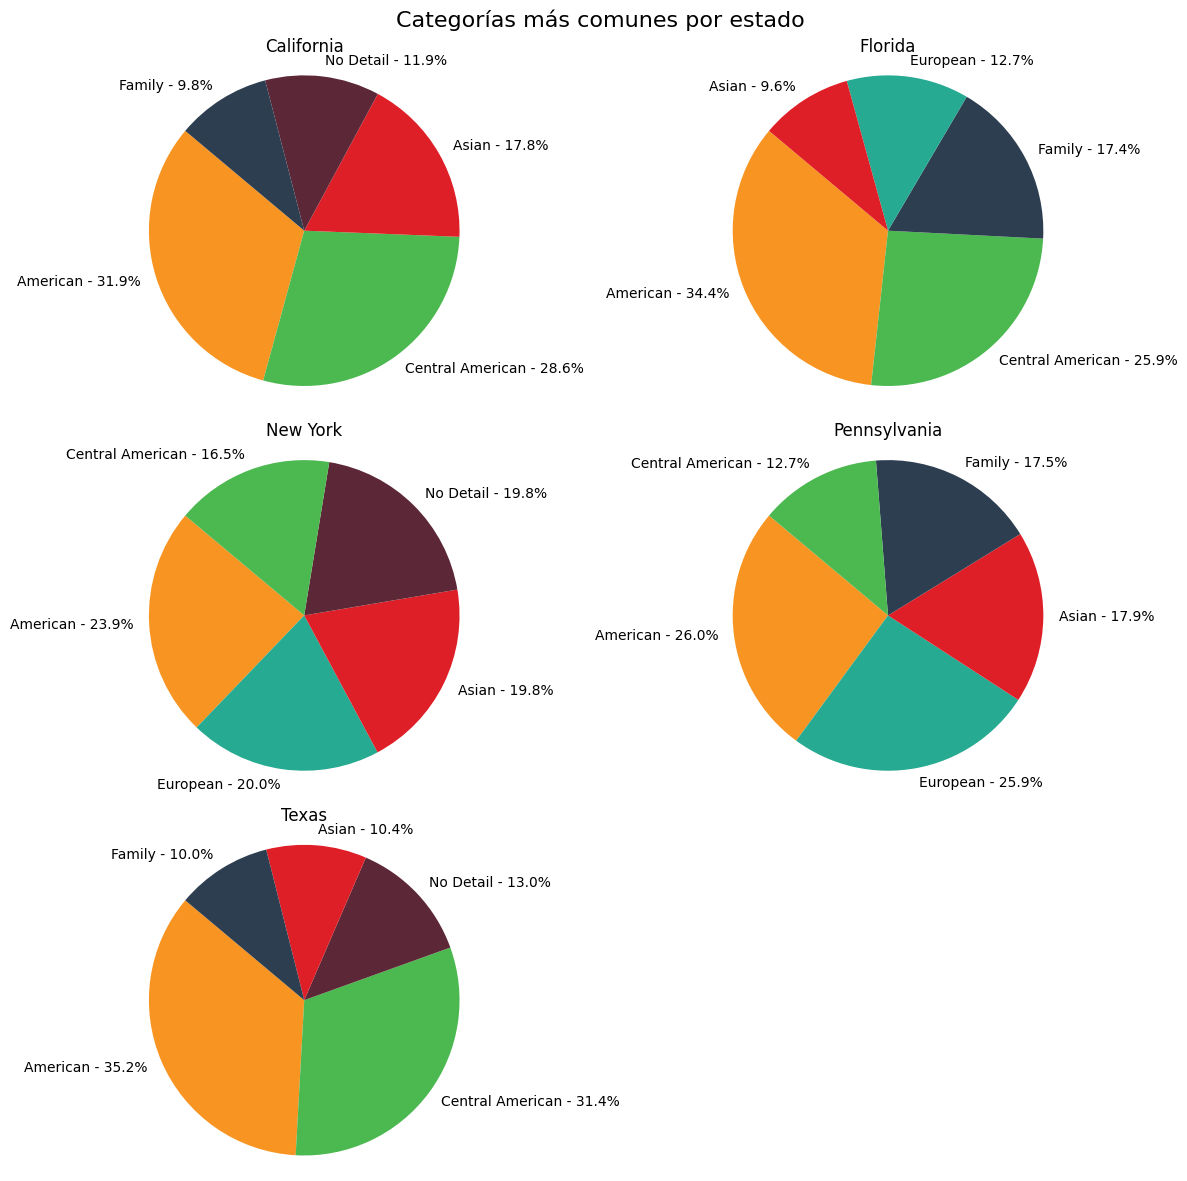

In [40]:
functions.cantidad_categorias(df_final)

In [37]:
!pip install plotly

Éstos gráficos por último, nos ayudan a entender cuáles son las tendencias y demandas de cada estado. Entendiendo que los restaurantes de comida americana son los más demandados, pero también teniendo en cuenta la fuerte tendencia de los restaurantes y locales de comida **Latinoamericana** y **Europea**. Esto debido a la cantidad de inmigrantes registrados en todo el país en general.

## Conclusiones

***Como conclusión podemos destacar y afirmar lo siguiente:***
- **La pandemia tuvo un fuerte impacto en el crecimiento del sector gastronómico, llevando a la disminución significativa en la cantidad de restaurantes y locales en la mayoría de los estados analizados.** Lo cual también significa una oportunidad para la reactivación económica debido a la debilidad de los locales ya establecidos.
- **La recomendación mas directa es, la inversión en los estados de Pennsylvania y Florida**, debido a la baja calidad de restaurantes los cuales representan, a nivel porcentual, los niveles más bajos de competencia en el mercado.
- **Fuerte influencia de la cultura extranjera en el sector gastronómico.** Esto significa una oportunidad de inversión en un mercado que garantiza un constante crecimiento y mantenimiento de mercado debido a los residentes extranjeros y las visitas.

# ***Visto esto de la oportunidad de inversión en Pennsylvania y Florida, procedemos a realizar un análisis más preciso en esos dos estados para terminar de definir una recomendación de inversión.***

In [2]:
# Extraemos los datos que solamente sean de Pennsylvania y Florida.

df_final = pd.read_parquet('/content/datos_finales_corregidos.parquet')

In [3]:
# Modificamos los registros donde aparece Philadelpia en distintos estados.

correcto = {'Philadelphia' : 'Pennsylvania'}

filtro = (df_final['city'] == 'Philadelphia') & (df_final['state']!= 'Pennsylvania')

df_final.loc[filtro, 'state'] = df_final.loc[filtro, 'city'].map(correcto)

In [13]:
# Modificamos los registros donde Tampa no esté en Florida

correcto1 = {'Tampa' : 'Florida'}

filtro1 = (df_final['city'] == 'Tampa') & (df_final['state']!= 'Florida')

df_final.loc[filtro1, 'state'] = df_final.loc[filtro1, 'city'].map(correcto1)

In [22]:
# Guardamos los cambios generados en un nuevo archivo

df_final.to_parquet('eda.parquet')

In [25]:
# Filtramos solamente los registros de Pennsylvania y Florida para el análisis

df_filtrado = df_final[(df_final['state'] == 'Pennsylvania') | (df_final['state'] == 'Florida')]

df_filtrado.state.unique()

array(['Pennsylvania', 'Florida'], dtype=object)

In [26]:
df_filtrado.head(3)

,user_id,business_id,rating,year,month,sentiment_analysis,business_name,category,avg_rating,review_count,address,state,city,postal_code,latitude,longitude,county,%_competence
0,3-1va0IQfK-9tUMzfHWfTA,MTSW4McQd7CbVtyjqoe9mw,5.0,2018,5,5,St Honore Pastries,Cafe,4.0,80.0,935 Race St,Pennsylvania,Philadelphia,19107,39.955505,-75.155564,Philadelphia County,3.96668
1,KQSRUu4Aapl0hG6eu2v8iw,MTSW4McQd7CbVtyjqoe9mw,4.0,2018,3,5,St Honore Pastries,Cafe,4.0,80.0,935 Race St,Pennsylvania,Philadelphia,19107,39.955505,-75.155564,Philadelphia County,3.96668
2,qUfRCH5NUyRDsJfM6jA5PQ,MTSW4McQd7CbVtyjqoe9mw,4.0,2017,4,5,St Honore Pastries,Cafe,4.0,80.0,935 Race St,Pennsylvania,Philadelphia,19107,39.955505,-75.155564,Philadelphia County,3.96668


# Graficar solamente los estados de Pennsylvania y Florida

###***Distribución de restaurantes por cada ciudad***

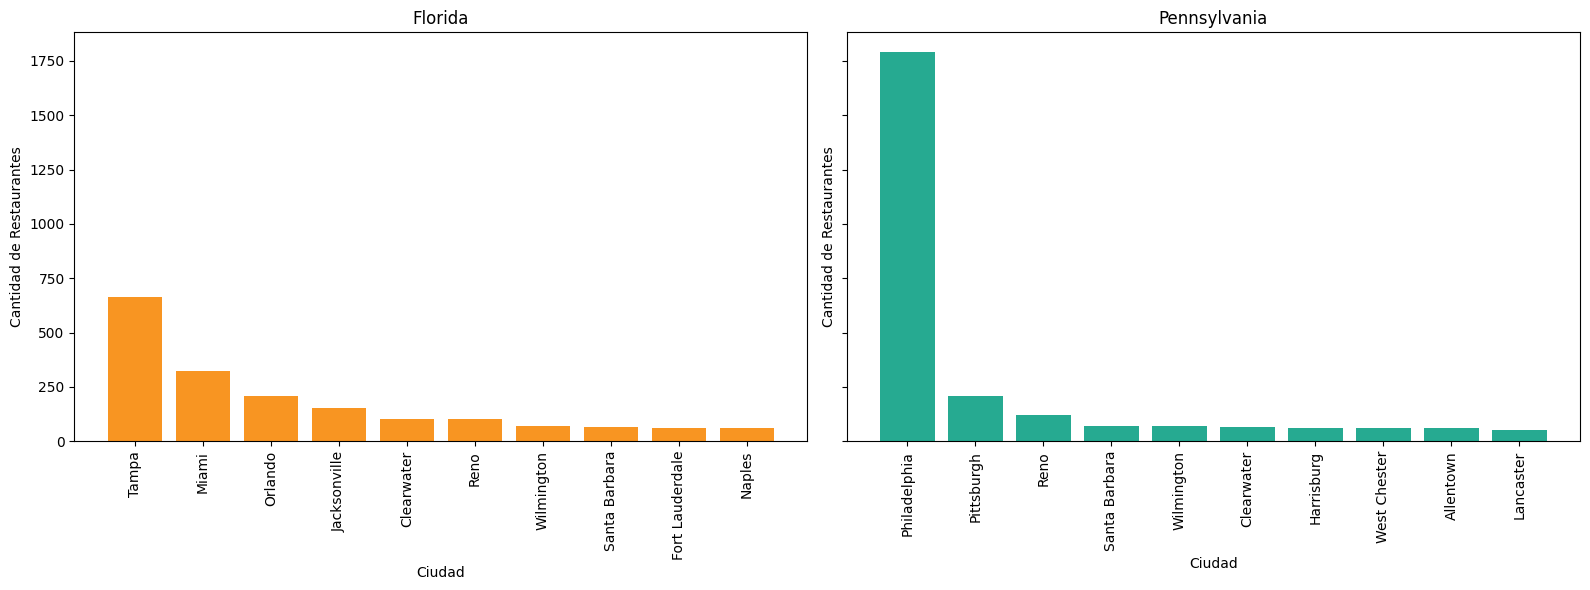

In [28]:
functions.restaurantes_por_ciudad(df_filtrado)

### ***Categorías más comunes en cada estado***

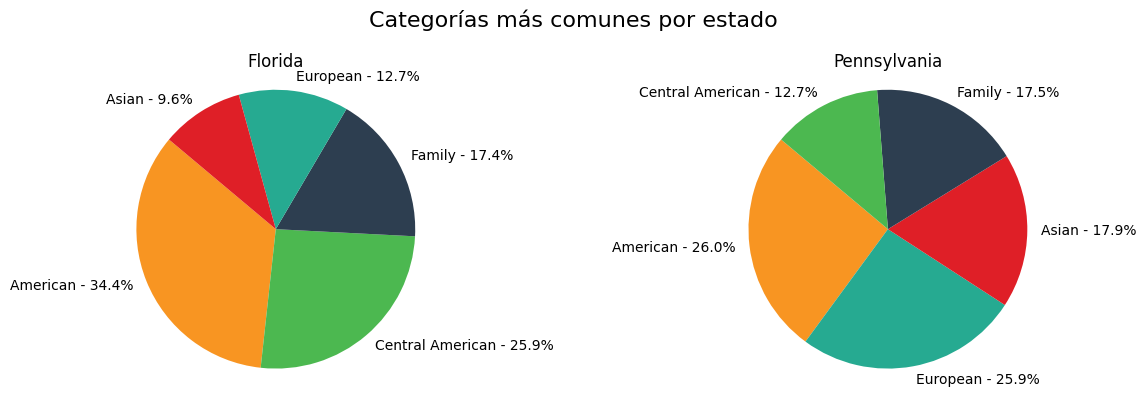

In [56]:
functions.cantidad_categorias(df_filtrado)

# Graficar la categorias de restaurantes en cada condado

In [124]:
# Se modifican los registros donde Pinellas County no esté en Florida

correcto = {'Pinellas County' : 'Florida'}

filtro = (df_filtrado['county'] == 'Pinellas County') & (df_filtrado['state']!= 'Florida')

df_filtrado.loc[filtro, 'state'] = df_filtrado.loc[filtro, 'county'].map(correcto)

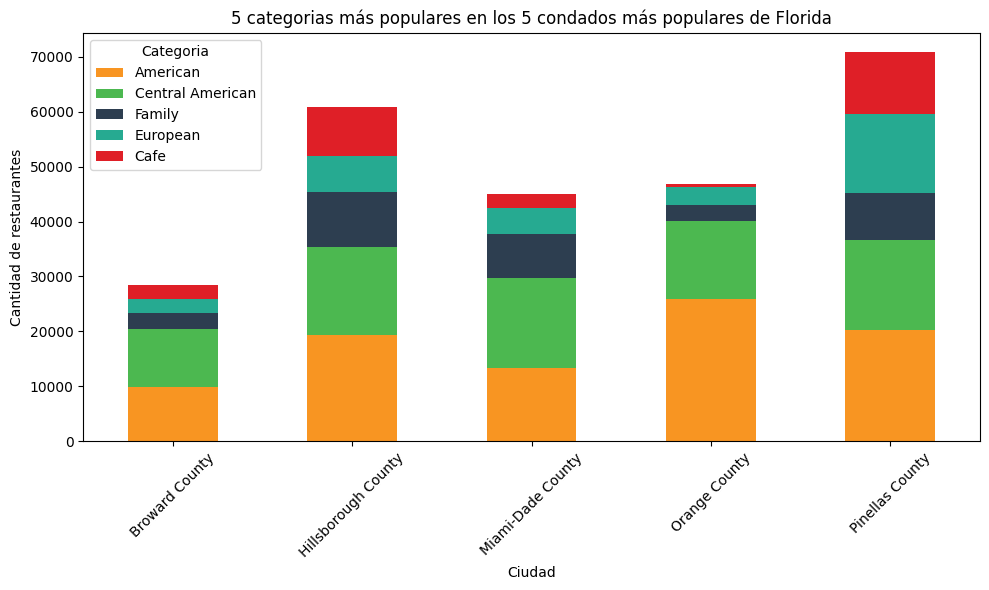

In [176]:
functions.categoria_por_condado(df_filtrado, 'Florida')

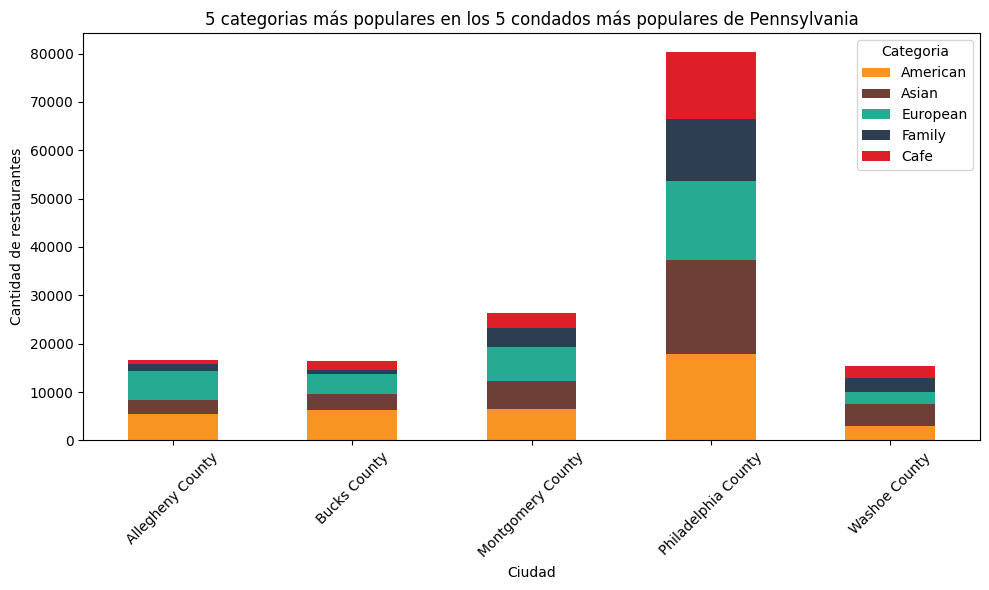

In [179]:
functions.categoria_por_condado(df_filtrado, 'Pennsylvania')

## Se filtra por los condados más populares para poder realizar un análisis más certero de la ubicación.
- **En Florida** : 'Broward County', 'Hillsborough County', 'Miami-Dade County', 'Orange County', 'Pinellas County'
- **En Pennsylvania** : 'Philadelphia County', 'Allegheny County', 'Montgomery County', 'Bucks County'



In [137]:
df_florida = df_filtrado[(df_filtrado['state'] == 'Florida') & (df_filtrado['county'].isin(['Broward County', 'Hillsborough County', 'Miami-Dade County', 'Orange County', 'Pinellas County']))]

df_pennsilvania = df_filtrado[(df_filtrado['state'] == 'Pennsylvania') & (df_filtrado['county'].isin(['Philadelphia County', 'Allegheny County', 'Montgomery County', 'Bucks County']))]

###Rating promedio de cada condado

In [138]:
functions.promedio_rating_por_ciudad(df_pennsilvania)

,county,avg_rating
0,Allegheny County,4.25
1,Bucks County,4.13
2,Montgomery County,3.98
3,Philadelphia County,3.97


In [139]:
functions.promedio_rating_por_ciudad(df_florida)

,county,avg_rating
0,Broward County,4.17
1,Hillsborough County,3.96
2,Miami-Dade County,4.20
3,Orange County,4.22
4,Pinellas County,4.07


##Promedio de rating de cada condado a través de los años

### Florida

In [140]:
tabla_pivot = pd.pivot_table(df_florida, values='rating', index='county', columns='year', aggfunc='mean')

tabla_pivot

year,2016,2017,2018,2019,2020,2021
county,,,,,,
Broward County,4.128010,4.182310,4.181171,4.213030,4.270498,4.256111
Hillsborough County,3.818285,3.913941,3.975652,4.028049,4.048344,3.913885
Miami-Dade County,4.080495,4.193332,4.233688,4.283287,4.313342,4.294635
Orange County,4.217372,4.227944,4.262667,4.271293,4.312076,4.261876
Pinellas County,3.896332,3.990660,4.108127,4.135763,4.187814,4.033367


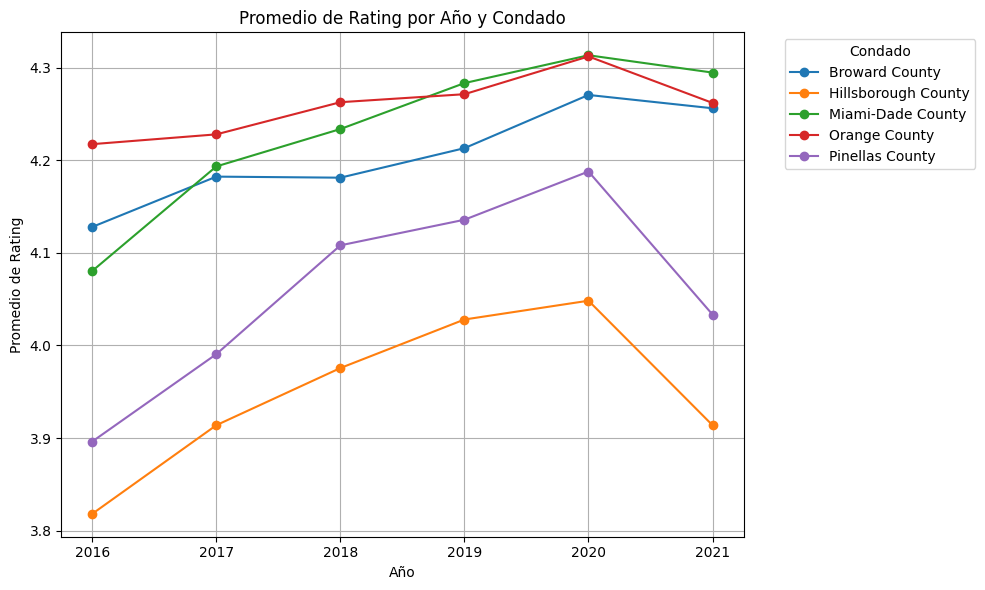

In [180]:
# Transponer la tabla pivoteada
tabla_transpuesta = tabla_pivot.transpose()

# Graficar la tabla transpuesta
tabla_transpuesta.plot(kind='line', marker='o', figsize=(10, 6))

# Configurar el título y los ejes
plt.title('Promedio de Rating por Año y Condado')
plt.xlabel('Año')
plt.ylabel('Promedio de Rating')
plt.grid(True)

# Mostrar la gráfica
plt.legend(title='Condado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Pennsylvania

In [142]:
tabla_pivot2 = pd.pivot_table(df_pennsilvania, values='rating', index='county', columns='year', aggfunc='mean')

tabla_pivot2

year,2016,2017,2018,2019,2020,2021
county,,,,,,
Allegheny County,4.216162,4.194346,4.250641,4.293806,4.390159,4.471622
Bucks County,3.742639,4.083229,4.139304,4.241451,4.259506,4.183939
Montgomery County,3.705394,3.925458,3.977692,4.061663,4.103873,4.012190
Philadelphia County,3.813440,3.935182,3.952404,4.001468,4.031888,4.008791


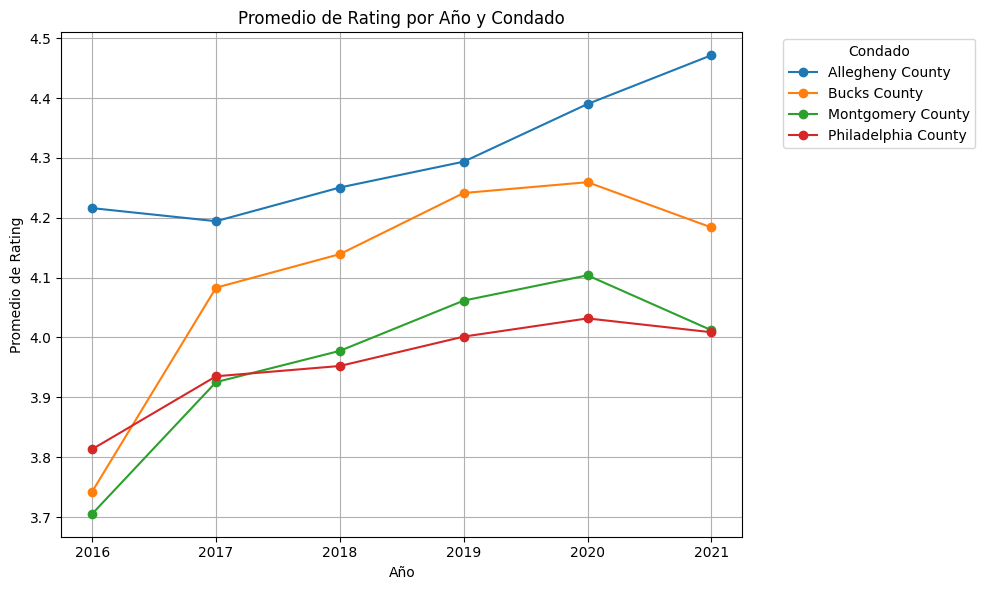

In [181]:
# Transponer la tabla pivoteada
tabla_transpuesta = tabla_pivot2.transpose()

# Graficar la tabla transpuesta
tabla_transpuesta.plot(kind='line', marker='o', figsize=(10, 6))

# Configurar el título y los ejes
plt.title('Promedio de Rating por Año y Condado')
plt.xlabel('Año')
plt.ylabel('Promedio de Rating')
plt.grid(True)

# Mostrar la gráfica
plt.legend(title='Condado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

En los gráficos podemos observar que los condados que menos competencia representan en cada estado son los siguientes:
- Florida: Hillsborough County
- Pennsylvania: Philadelphia County

Esto debido al poco crecimiento y al bajo promedio de rating que muestran ambos condados respectos a los demás, a niveles generales a través de los años.

In [144]:
# Se filtran los dataframes para que unicamente tengan los registros de los condados indicados anteriormente.

df_1 = df_florida[df_florida['county'] == 'Hillsborough County']

df_2 = df_pennsilvania[df_pennsilvania['county']== 'Philadelphia County']

###Categorias y porcentaje de competencia en Hillsborough County

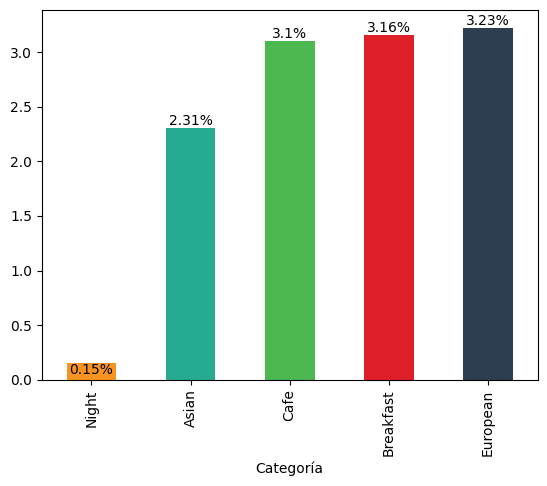

In [174]:
colores = ['#F89522', '#26AA91', '#4CB850', '#DF1F27', '#2D3E50']

# Seleccionamos las primeras 5 categorías
df_1_5 = df_1.groupby('category')['%_competence'].mean().sort_values(ascending=True).head(5)

# Crear el gráfico
ax = df_1_5.plot(kind='bar', color=colores)

# Agregar valor a cada barra
for i, bar in enumerate(ax.patches):
    # Ajuste para el centrado vertical del texto
    y_pos = bar.get_height()
    if y_pos > 0.9:
        va = 'bottom'
    else:
        va = 'top'
    ax.annotate(f'{round(df_1_5.iloc[i], 2)}%',
                (bar.get_x() + bar.get_width() / 2, y_pos),
                ha='center', va=va,
                fontsize=10)

# Agregar nombres a los ejes
ax.set_xlabel('Categoría')
ax.set_ylabel('Porcentaje de competencia')

plt.show()


###Categorias y porcentaje de competencia en Philadelphia County

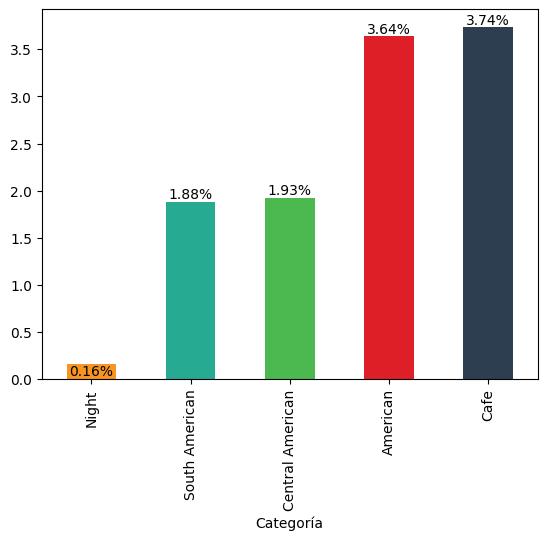

In [175]:
colores = ['#F89522', '#26AA91', '#4CB850', '#DF1F27', '#2D3E50']

# Seleccionamos las primeras 5 categorías
df_1_5 = df_2.groupby('category')['%_competence'].mean().sort_values(ascending=True).head(5)

# Crear el gráfico
ax = df_1_5.plot(kind='bar', color=colores)

# Agregar valor a cada barra
for i, bar in enumerate(ax.patches):
    # Ajuste para el centrado vertical del texto
    y_pos = bar.get_height()
    if y_pos > 0.9:
        va = 'bottom'
    else:
        va = 'top'
    ax.annotate(f'{round(df_1_5.iloc[i], 2)}%',
                (bar.get_x() + bar.get_width() / 2, y_pos),
                ha='center', va=va,
                fontsize=10)

# Agregar nombres a los ejes
ax.set_xlabel('Categoría')


plt.show()


# En base a los visto en los dos últimos gráficos, podemos concluir en lo siguiente:
## - En el condado de Hillsborough County de Florida, es conveniente invertir en restaurantes de tipo *Asian*.
## - En el condado de Philadelphia County de Pennsylvania, es conveniente invertir en restaurantes de tipo *South American o Central American*, se dan ambas opciones, debido a la baja diferencia entre ambas.